In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import transforms

from torchvision.utils import save_image

import cv2

%matplotlib inline

## 创建小样本对应的文件夹

In [2]:
print(os.getcwd())

/home/rush/Face_Recognize


In [3]:
if not os.path.exists(os.path.join('facedata', 'black')):
    os.mkdir(os.path.join('facedata', 'black'))
    
if not os.path.exists(os.path.join('facedata', 'asian')):
    os.makedirs(os.path.join('facedata', 'asian'))
    
if not os.path.exists(os.path.join('facedata', 'hispanic')):
    os.mkdir(os.path.join('facedata', 'hispanic'))
    
if not os.path.exists(os.path.join('facedata', 'other')):
    os.makedirs(os.path.join('facedata', 'other'))

## 复制对应的样本到各个目录中

In [6]:
import shutil

def mycopyfile(srcdir,srcfadir):
    
    # 判断样本所属人种
    for fname in os.listdir(srcdir):
        if not fname.endswith('.png'):
            continue
        
        _, race, _ = fname.split('.')
        
        srcfile = srcdir + fname
        if race == 'white':
            continue
        elif race == 'black':
            dstfile = srcfadir + '/black/' + fname
            shutil.copyfile(srcfile, dstfile)      #复制文件
            print("copy %s -> %s" %( srcfile,dstfile))
        elif race == 'asian':
            dstfile = srcfadir + '/asian/' + fname
            shutil.copyfile(srcfile, dstfile)      #复制文件
            print("copy %s -> %s" %( srcfile,dstfile))
        elif race == 'hispanic':
            dstfile = srcfadir + '/hispanic/' + fname
            shutil.copyfile(srcfile, dstfile)      #复制文件
            print("copy %s -> %s" %( srcfile,dstfile))
        elif race == 'other':
            dstfile = srcfadir + '/other/' + fname
            shutil.copyfile(srcfile, dstfile)      #复制文件
            print("copy %s -> %s" %( srcfile,dstfile))
    
src = '/home/rush/Face_Recognize/facedata/train/'
srcfa = '/home/rush/Face_Recognize/facedata'

mycopyfile(src, srcfa)

copy /home/rush/Face_Recognize/facedata/train/2479.asian.png -> /home/rush/Face_Recognize/facedata/asian/2479.asian.png
copy /home/rush/Face_Recognize/facedata/train/2580.black.png -> /home/rush/Face_Recognize/facedata/black/2580.black.png
copy /home/rush/Face_Recognize/facedata/train/2926.asian.png -> /home/rush/Face_Recognize/facedata/asian/2926.asian.png
copy /home/rush/Face_Recognize/facedata/train/2494.asian.png -> /home/rush/Face_Recognize/facedata/asian/2494.asian.png
copy /home/rush/Face_Recognize/facedata/train/2554.black.png -> /home/rush/Face_Recognize/facedata/black/2554.black.png
copy /home/rush/Face_Recognize/facedata/train/3053.black.png -> /home/rush/Face_Recognize/facedata/black/3053.black.png
copy /home/rush/Face_Recognize/facedata/train/1988.other.png -> /home/rush/Face_Recognize/facedata/other/1988.other.png
copy /home/rush/Face_Recognize/facedata/train/2593.black.png -> /home/rush/Face_Recognize/facedata/black/2593.black.png
copy /home/rush/Face_Recognize/facedata/

## 创建样本随机变换规则

(200, 200, 3)


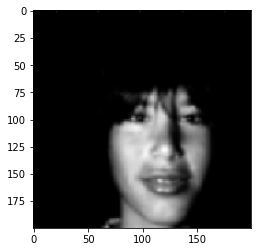

In [3]:
trans1 = transforms.RandomCrop(128, 128) # 随机裁剪
trans2 = transforms.RandomHorizontalFlip()  # 水平翻转
trans3 = transforms.RandomRotation(degrees = 45)  #  中心旋转
#trans4 = transforms.RandomVerticalFlip()  # 垂直翻转
trans5 = transforms.RandomResizedCrop(200)

img = Image.open(os.path.join('facedata', 'asian', '1334.asian.png'))
img1 = trans5(img)
img1 = np.array(img1)
print(img1.shape)
#plt.imshow(img)
plt.imshow(img1)
#plt.savefig('test')

In [5]:
data_transforms = transforms.Compose([trans2, trans3, trans5])

def expand_small_sample(srcdir):
    #  获得样本总数
    file_nums = len([listx for listx in os.listdir(srcdir)])
    #print(file_nums)

    #  计算应当操作的次数
    oper_num = 1900 // file_nums
    #print(oper_num)
    
    #  对原有样本进行操作
    for fname in os.listdir(srcdir):
        for i in range(oper_num):
            idx, race, _ = fname.split('.')
            #print(idx, race)
            #  给新样本命名  总样本量为4000，所以在原有基础上加4000保证id唯一
            idx_n = str(int(idx) + 4000) + '_' + str(i)
            #print(idx_n)
            old_sample = Image.open(os.path.join(srcdir + fname))
            new_sample = data_transforms(old_sample)
            #print(type(new_sample))
            #new_sample = transforms.ToTensor()(new_sample)
            #new_sample = np.asarray(new_sample)
            #print(type(new_sample))
            #new_sample = np.asarray(new_sample)
            #new_sample = np.ndarray(new_sample)
            # 保存新样本
            new_sample.save(srcdir + idx_n + '.' + race + '.png')
            #cv2.imwrite(srcdir + idx_n + '.' + race + '.png', new_sample)
    print('done')
    
other_dir = '/home/rush/Face_Recognize/facedata/other/'
black_dir = '/home/rush/Face_Recognize/facedata/black/'
asian_dir = '/home/rush/Face_Recognize/facedata/asian/'
hispanic_dir = '/home/rush/Face_Recognize/facedata/hispanic/'

expand_small_sample(other_dir)
expand_small_sample(black_dir)
expand_small_sample(asian_dir)
expand_small_sample(hispanic_dir)

done
done
done
done
